# SLEEP HEALTH AND LIFESTYLE

# Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

## 1) Problem statement

* This project aims to understand how sleep affects health and lifestyle, as sleep plays a vital role in maintaining overall well-being.

## 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
* The data consists of 374 rows and 13 columns.

### 2.1 Import Data and Required Packages

* Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

* Import CSV Data as Pandas DataFrame

In [72]:
df = pd.read_csv('DATA/Sleep_health_and_lifestyle_dataset.csv')

### 2.2 Understanding the data

* Dataset first view

In [73]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


As we can see, our dataset contains both numerical and categorical columns.\
i.e.
1. Categorical (Ordinal and Nominal) 
2. Numerical (Continous and Discreet)

In [74]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


* Dataset Rows & Columns count

In [75]:
# Dataset Rows & Columns count

df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [76]:
df.shape

(374, 13)

The datset contains of total 374 rows and 13 columns.

### 2.3 Dataset Information

* Person ID: An identifier for each individual in the dataset.

* Gender: The gender of the person (Male/Female).

* Age: The age of the person in years.

* Occupation: The occupation or profession of the person.

* Sleep Duration (hours): The number of hours the person sleeps per day.

* Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10

* Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

* Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

* BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

* Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

* Heart Rate (bpm): The resting heart rate of the person in beats per minute.

* Daily Steps: The number of steps the person takes per day.

* Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

This dataset provides a rich source of information for exploring the impact of various lifestyle factors on sleep health. Analyzing this data can yield valuable insights and assist in developing strategies to improve sleep quality and overall well-being.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## 3. Data Checks to perform 

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 3.1 Checking Missing Values

In [78]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

* As we can see in the dataset, there are no missing values in the `Sleep Disorder` column. The `NaN` values represent individuals who do not have any sleep disorder and should be categorized as 'No Sleep Disorder'. Therefore, 'Insomnia', 'Sleep Apnea', and 'No Sleep Disorder' are the three categories in `Sleep Disorder`, allowing us to obtain accurate insights.

In [79]:
df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)

### 3.2 Check Duplicates

In [80]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set

### 3.3 Check data types

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### 3.4 Checking the number of unique values of each column

In [82]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

### 3.5 Check statistics of data set

In [83]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


1. **Age Distribution:**
   - **Mean Age**: 42.2 years
   - **Standard Deviation**: 8.67 years

2. **Sleep Duration:**
   - **Average**: 7.13 hours
   - **Standard Deviation**: 0.8 hours

3. **Sleep Quality:**
   - **Average**: 7.31
   - **Standard Deviation**: 1.20

4. **Physical Activity Level:**
   - **Mean**: 59.17
   - **Standard Deviation**: 20.83

5. **Stress Level:**
   - **Average**: 5.39
   - **Standard Deviation**: 1.77

6. **Heart Rate:**
   - **Average**: 70.17 bpm
   - **Standard Deviation**: 4.14 bpm

7. **Daily Steps:**
   - **Average**: 6816.84 steps
   - **Standard Deviation**: 1617.92 steps

**Key metrics for EDA:**
- **Means** and **Standard Deviations** for understanding central tendency and variability.
- **Ranges** and **Distributions** to grasp the spread and potential outliers.

These metrics will help in identifying patterns, outliers, and relationships among variables.

### 3.6 Check various categories present in the different categorical column

In [84]:
# Unique values and counts for Occupation
print('List of Unique Occupations:', df['Occupation'].unique(), '| Count of Unique Occupations:', df['Occupation'].nunique())

print()

# Unique values and counts for BMI Category
print('List of Unique BMI Category:', df['BMI Category'].unique(), '| Coungt of Unique BMI Category:', df['BMI Category'].nunique())

print()

# Unique values and counts for Genders
print('List of Unique Genders:', df['Gender'].unique(), '|Count of Unique Genders:', df['Gender'].nunique())

print()

# Unique values and counts for Sleep Disorder
print('List of Unique Sleep Disorders:', df['Sleep Disorder'].unique(), '|Count of Unique Sleep Disorders:', df['Sleep Disorder'].nunique())


List of Unique Occupations: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager'] | Count of Unique Occupations: 11

List of Unique BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight'] | Coungt of Unique BMI Category: 4

List of Unique Genders: ['Male' 'Female'] |Count of Unique Genders: 2

List of Unique Sleep Disorders: ['No Sleep Disorder' 'Sleep Apnea' 'Insomnia'] |Count of Unique Sleep Disorders: 3


OBSERVATIONS

1. Occupation 
* **Encoding Technique:** One-Hot Encoding
* **Reason:** Occupations are nominal categories without an inherent order. One-Hot Encoding is suitable as it creates binary columns for each occupation, allowing the model to treat each occupation as a separate feature without implying any ordinal relationship.

2. BMI Category
* **Encoding Technique:** Ordinal Encoding
* **Reason:** BMI categories have a clear ordinal relationship (Normal Weight < Normal < Overweight < Obese). Ordinal Encoding preserves this order by mapping categories to integer values based on their rank, which can be beneficial for models that leverage this ordinal information.

3. Genders
* **Encoding Technique:** Label Encoding
* **Reason:** With only two categories, Label Encoding is effective. It converts Male and Female into binary values (e.g., 0 and 1). This simple approach works well for binary categorical features.

4. Sleep Disorders 
* **Encoding Technique:**: One-Hot Encoding
* **Reason:** Sleep Disorders are nominal categories without a specific order. One-Hot Encoding is appropriate as it converts each disorder into binary columns, avoiding the imposition of any ordinal relationship and ensuring each disorder is treated as a separate feature.

In [85]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## 4. EDA

In [86]:
import os
#copying the dataframe
df1 = df.copy()
df1 

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


* As we can see the 'Blood Pressure' column is not being captured due to the split. Lets split Blood Pressure Upper_BP and Lower_BP and try again.

In [87]:
# Splitting Blood pressure as Systolic_BP and Diastolic_BP.
df1[['Systolic_BP','Diastolic_BP']]=df1['Blood Pressure'].str.split('/', expand=True)

In [88]:
# Converting from object type to int type
df1[['Systolic_BP','Diastolic_BP']]=df1[['Systolic_BP','Diastolic_BP']].astype(float)

In [89]:
# Dropping BP column
df1.drop('Blood Pressure',axis=1,inplace=True)

In [90]:
df1

desktop_path = '/Users/syed/Desktop'
file_path = os.path.join(desktop_path, 'df1.csv')

# Save the DataFrame to a CSV file on the Desktop
df1.to_csv(file_path, index=False)

In [91]:
# seperating our Categorical and Numerical data

Categorical_f1 = ['Gender','Occupation', 'BMI Category', 'Sleep Disorder']
Numerical_f2 =  ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Daily Steps','Systolic_BP','Diastolic_BP']

### 4.1 Univariate Analysis

#### 4.1.1 Categorical Columns

In [92]:
import plotly.express as px
import plotly.graph_objects as go 

# Defining a function to create and show a donut chart
def create_donut_chart(labels, values, title):
    fig = go.Figure(data=[go.Pie(
        labels=labels,
        values=values,
        textinfo='percent+label',
        hole=0.5  
    )])
    fig.update_layout(
        title=title,
        showlegend=True,
        width=600,
        height=400,
        margin=dict(l=0, r=0, t=50, b=0)
    )
    fig.show()

# Defining a function to create and show a bar chart
def create_bar_chart(labels, values, title):
    fig = go.Figure()
    
    for label, value in zip(labels, values):
        fig.add_trace(go.Bar(
            x=[label],        
            y=[value],        
            text=[value],     
            textposition='outside',
            name=label
        ))
    
    fig.update_layout(
        title=title,    
        xaxis_title='Categories', 
        yaxis_title='Values',      
        width=600,
        height=400,
        margin=dict(l=0, r=0, t=50, b=0),
        legend_title="Legend",
        legend=dict(
            x=1.05,  # Position the legend to the right of the chart
            y=1,
            traceorder='normal',
            orientation='v'
        )
    )
    fig.show()

##### A) Donut Chart for **"GENDER"**

In [93]:
# Create and show a donut chart for Gender distribution
create_donut_chart(
    labels=df1['Gender'].value_counts().index,
    values=df1['Gender'].value_counts(),
    title='Distribution of Gender'
)

# Create and show a bar chart for Gender distribution
create_bar_chart(
    labels=df1['Gender'].value_counts().index,
    values=df1['Gender'].value_counts(),
    title='Distribution of Gender'
)


##### B) Donut chart for **"OCCUPATION"**

In [94]:
create_donut_chart(
    labels=df1['Occupation'].value_counts().index,
    values=df1['Occupation'].value_counts(),
    title='Distribution of Occupation'
)

create_bar_chart(
    labels=df1['Occupation'].value_counts().index,
    values=df1['Occupation'].value_counts(),
    title='Distribution of Occupation'
)

##### C) Donut chart for **"BMI Category"**

In [95]:
create_donut_chart(
    labels=df1['BMI Category'].value_counts().index,
    values=df1['BMI Category'].value_counts(),
    title='Distribution of BMI Category'
)

create_bar_chart(
    labels=df1['BMI Category'].value_counts().index,
    values=df1['BMI Category'].value_counts(),
    title='Distribution of BMI Category'
)

##### D) Donut chart for **"Sleep Disorder"**

In [96]:
create_donut_chart(
    labels=df1['Sleep Disorder'].value_counts().index,
    values=df1['Sleep Disorder'].value_counts(),
    title='Distribution of Sleep Disorder'
)

create_bar_chart(
    labels=df1['Sleep Disorder'].value_counts().index,
    values=df1['Sleep Disorder'].value_counts(),
    title='Distribution of Sleep Disorder'
)

##### E) **Findings from Categorical Columns**

- **Gender**: The dataset is almost evenly split between males (189) and females (185).

- **Occupation**: The most common occupations are Nurses (73) and Doctors (71). Fewer individuals are Software Engineers (4), Scientists (4), and Managers (1).

- **BMI Category**: Most individuals fall into the 'Normal' (195) and 'Overweight' (148) categories. A smaller number are classified as 'Normal Weight' (21) and 'Obese' (10).

- **Sleep Disorder**: The majority have 'No Sleep Disorder' (219), followed by 'Sleep Apnea' (78) and 'Insomnia' (77).


#### 4.1.2 Numerical Columns

In [97]:
import plotly.express as px

def plot_histograms(dataframe, numerical_features):
    for feature in numerical_features:
        if feature not in dataframe.columns:
            raise ValueError(f"Feature '{feature}' not found in the DataFrame.")
    
    for feature in numerical_features:
        fig = px.histogram(
            dataframe, x=feature, color_discrete_sequence=['#1f77b4'], 
            marginal='box',  
            title=f'Histogram of {feature}'
        )
        
        fig.update_layout(
            title={
                'text': f'Histogram of {feature}',
                'font': {'size': 24},
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'
            },
            xaxis_title={
                'text': feature,
                'font': {'size': 18}
            },
            yaxis_title={
                'text': 'Frequency',
                'font': {'size': 18}
            },
            template='plotly_dark',  
            legend_title='Legend',
            hovermode='x unified',
            margin=dict(l=40, r=40, t=60, b=40),  
            paper_bgcolor='rgba(0,0,0,0)',  
            plot_bgcolor='rgba(0,0,0,0)',  
            autosize=True,  
            width=1000,     
            height=600      
        )
        
        mean_value = dataframe[feature].mean()
        median_value = dataframe[feature].median()
        
        fig.add_vline(
            mean_value, line_dash="dash", line_color="red",
            annotation_text="Mean", annotation_position="top left"
        )
        fig.add_vline(
            median_value, line_dash="dash", line_color="green",
            annotation_text="Median", annotation_position="top right"
        )
        
        fig.show()

##### A) Boxplot & Histogram for **"Age"**

In [98]:
plot_histograms(df1, ['Age'])

##### B) Boxplot & Histogram for **"Sleep Duration"**

In [99]:
plot_histograms(df1, ['Sleep Duration'])

##### C) Bloxplot & Histogram for **"Quality of sleep"**

In [100]:
plot_histograms(df1, ['Quality of Sleep'])

##### D) Bloxplot & Histogram for **"Physical Activity Level"**

In [101]:
plot_histograms(df1, ['Physical Activity Level'])

##### E) Bloxplot & Histogram for **"Stress Level"**

In [102]:
plot_histograms(df1, ['Stress Level'])

##### F) Bloxplot & Histogram for **"Heart Rate"**

In [103]:
plot_histograms(df1, ['Heart Rate'])

##### G) Bloxplot & Histogram for **"Daily Steps"**

In [104]:
plot_histograms(df1, ['Daily Steps'])

##### H) Bloxplot & Histogram for **"Systolic BP"**

In [105]:
plot_histograms(df1, ['Systolic_BP'])

##### I) Bloxplot & Histogram for **"Diastolic BP"**

In [106]:
plot_histograms(df1, ['Diastolic_BP'])

##### J) **Findings for Numerical Columns**

- **Age**: The average age is approximately 42 years, with most individuals aged between 35 and 50 years.

- **Sleep Duration**: The average sleep duration is around 7.13 hours, ranging from 5.8 to 8.5 hours.

- **Quality of Sleep**: The average quality of sleep score is around 7.31, indicating moderately good sleep quality.

- **Physical Activity Level**: The average physical activity level is 59, with a significant range from 30 to 90.

- **Stress Level**: The average stress level is about 5.38, with most people reporting a level between 4 and 7.

- **Heart Rate**: The average heart rate is around 70 beats per minute, with some variation.

- **Daily Steps**: The average number of daily steps is around 6816, with a wide range from 3000 to 10000.

- **Systolic_BP**: The average systolic blood pressure is approximately 128.55 mmHg.

- **Diastolic_BP**: The average diastolic blood pressure is approximately 84.65 mmHg.


### 4.2 Bivariate Analysis

#### 4.2.1 Categorical VS Categorical Columns

In [107]:
print(Categorical_f1)

['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


In [108]:
import pandas as pd
import plotly.express as px

def plot_categorical_charts(df, cat1, cat2):
    if cat1 not in df.columns or cat2 not in df.columns:
        raise ValueError(f"Columns '{cat1}' and/or '{cat2}' are not in the DataFrame.")
    
    contingency_table = pd.crosstab(df[cat1], df[cat2])
    contingency_table_melted = contingency_table.reset_index().melt(id_vars=[cat1], var_name=cat2, value_name='Count')

    hover_template = f'<b>Count:</b> %{{y}}<br><b>{cat1}:</b> %{{x}}<br><b>{cat2}:</b> %{{customdata[0]}}'

    fig_stacked = px.bar(
        contingency_table_melted, 
        x=cat1, 
        y='Count', 
        color=cat2, 
        title=f'Stacked Bar Chart: {cat1} vs {cat2}', 
        labels={'Count': 'Count'},
        text='Count', 
        height=500, 
        width=800,
        color_discrete_sequence=px.colors.qualitative.Plotly,
        custom_data=[contingency_table_melted[cat2]]
    )
    fig_stacked.update_layout(
        barmode='stack',
        title_font_size=20,
        xaxis_title=cat1,
        yaxis_title='Count',
        xaxis_tickangle=-45,
        xaxis_title_font_size=16,
        yaxis_title_font_size=16,
        legend_title_text=cat2,
        legend_title_font_size=14,
        legend_font_size=12,
        margin=dict(l=40, r=40, t=40, b=80)
    )
    fig_stacked.update_traces(
        hovertemplate=hover_template,
        texttemplate='%{y}',
        textposition='inside'
    )

    fig_grouped = px.bar(
        contingency_table_melted, 
        x=cat1, 
        y='Count', 
        color=cat2, 
        title=f'Grouped Bar Chart: {cat1} vs {cat2}', 
        labels={'Count': 'Count'},
        text='Count', 
        height=500, 
        width=800,
        color_discrete_sequence=px.colors.qualitative.Plotly,
        custom_data=[contingency_table_melted[cat2]]
    )
    fig_grouped.update_layout(
        barmode='group',
        title_font_size=20,
        xaxis_title=cat1,
        yaxis_title='Count',
        xaxis_tickangle=-45,
        xaxis_title_font_size=16,
        yaxis_title_font_size=16,
        legend_title_text=cat2,
        legend_title_font_size=14,
        legend_font_size=12,
        margin=dict(l=40, r=40, t=40, b=80)
    )
    fig_grouped.update_traces(
        hovertemplate=hover_template,
        texttemplate='%{y}',
        textposition='inside'
    )

    fig_stacked.show()
    fig_grouped.show()


##### A) **Gender VS Occupation**

In [109]:
plot_categorical_charts(df1, 'Gender', 'Occupation')

##### B) **Gender VS BMI Category**

In [110]:
plot_categorical_charts(df1, 'Gender', 'BMI Category')

##### C) **Gender VS Sleep Disorder**

In [111]:
plot_categorical_charts(df1, 'Gender', 'Sleep Disorder')

#####  D) **Occupation VS BMI Category**

In [112]:
plot_categorical_charts(df1, 'Occupation', 'BMI Category')

##### E) **Occupation VS Sleep Disorder**

In [113]:
plot_categorical_charts(df1, 'Occupation', 'Sleep Disorder')

##### F) **BMI Category VS Sleep Disorder**

In [114]:
plot_categorical_charts(df1, 'BMI Category', 'Sleep Disorder')

#### 4.2.2 Numerical VS Numerical Columns

In [115]:
print(Numerical_f2)

['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']


##### A) Correlation Dataframe

* Before visualizing all the variables, let's first determine the correlation between them and create a DataFrame that lists these correlations, ordered from the most strongly related to the least strongly related variables.*

In [116]:
import pandas as pd

correlation_matrix = df1[Numerical_f2].corr(method='spearman')


correlation_df = correlation_matrix.reset_index()
correlation_df = correlation_df.melt(id_vars='index')
correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

correlation_df = correlation_df[correlation_df['Variable 1'] < correlation_df['Variable 2']]

correlation_df['Absolute Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Absolute Correlation', ascending=False).drop(columns='Absolute Correlation')

correlation_df = correlation_df.reset_index(drop=True)

correlation_df


,Variable 1,Variable 2,Correlation
0,Diastolic_BP,Systolic_BP,0.983932
1,Quality of Sleep,Stress Level,-0.908147
2,Quality of Sleep,Sleep Duration,0.887398
3,Heart Rate,Stress Level,0.820297
4,Sleep Duration,Stress Level,-0.810633
5,Daily Steps,Physical Activity Level,0.793976
6,Heart Rate,Quality of Sleep,-0.734623
7,Heart Rate,Sleep Duration,-0.608920
8,Age,Systolic_BP,0.600480
9,Age,Diastolic_BP,0.559674


##### B) **Findings from Correlation**

1. **Strong Positive Correlations**:

   - **Systolic_BP and Diastolic_BP**: There is an exceptionally strong positive correlation (\( r = 0.98 \)) between High Blood Pressure (Systolic_BP) and Low Blood Pressure (Diastolic_BP). 

   - **Quality of Sleep and Stress Level**: A strong negative correlation (\( r = -0.91 \)) indicates that higher stress levels are associated with poorer sleep quality. This       aligns with common understanding that stress negatively affects sleep quality.

   - **Quality of Sleep and Sleep Duration**: A strong positive correlation (\( r = 0.89 \)) suggests that better quality sleep is associated with longer sleep duration.


2. **Other Notable Correlations**:

   - **Heart Rate and Stress Level**: There is a significant positive correlation (\( r = 0.82 \)) between Heart Rate and Stress Level, suggesting that increased stress is associated with an elevated heart rate.
   
   - **Daily Steps and Physical Activity Level**: A strong positive correlation (\( r = 0.79 \)) implies that a higher number of daily steps is strongly associated with a higher level of physical activity.

4. **Weak or Insignificant Correlations**:

   - **Daily Steps and Sleep Duration**: The correlation (\( r = 0.01 \)) is nearly zero, indicating no significant relationship between daily steps and sleep duration.

   - **Age and Physical Activity Level**: A very weak positive correlation (\( r = 0.14 \)) suggests that age has little to no effect on physical activity levels.

5. **Negative Correlations**:

   - **Age and Stress Level**: A moderate negative correlation (\( r = -0.43 \)) suggests that older individuals might experience slightly less stress, though this relationship is not very strong.



**Lets Visualize the data which are highly correlated**

In [117]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

def plot_with_trendline(df, x_var, y_var):
    # Calculate the Spearman correlation coefficient
    correlation_matrix = df[[x_var, y_var]].corr(method='spearman')
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_var], df[y_var])
    
    # Create a scatter plot
    fig = px.scatter(
        df,
        x=x_var,
        y=y_var,
        hover_data={x_var: True, y_var: True},
        title=f'Scatter plot of {x_var} VS {y_var} (Correlation: {correlation_matrix.loc[x_var, y_var]:.2f})'
    )
    
    # Add trendline without modifying the DataFrame
    fig.add_trace(go.Scatter(
        x=df[x_var],
        y=slope * df[x_var] + intercept,
        mode='lines',
        name='Trendline',
        line=dict(color='red')
    ))
    
    # Update layout settings
    fig.update_layout(
        width=800,  
        height=600, 
        autosize=True,  
        title_x=0.5,   
        legend=dict(
            x=1.05,       
            y=1,          
            traceorder='normal',
            orientation='v'  
        )
    )
    
    fig.show()


##### C) **Sleep Quality VS Stress Level**

In [118]:
plot_with_trendline(df1, 'Quality of Sleep', 'Stress Level')

 * Quality of Sleep and Stress Level (Correlation: -0.91)

    - **Insight:** Strong negative correlation shows that as stress levels rise, sleep quality drops.
    
    - **Implication:** Higher stress leads to poorer sleep quality.

##### D) **Sleep Quality VS Stress Level**

In [119]:
plot_with_trendline(df1, 'Quality of Sleep', 'Sleep Duration')

* Quality of Sleep and Sleep Duration (Correlation: 0.89)

    - **Insight:** Strong positive correlation means that longer sleep tends to improve sleep quality.
    
    - **Implication:** More sleep generally results in better quality sleep.

##### E) **Heart Rate VS Stress Level**

In [120]:
plot_with_trendline(df1, 'Heart Rate', 'Stress Level')

* Heart Rate and Stress Level (Correlation: 0.82)

    - **Insight:** Strong positive correlation indicates that higher stress levels are associated with an increased heart rate.
    
    - **Implication:** Stress tends to raise heart rate.


##### F) **Sleep Duration VS Stress Level**

In [121]:
plot_with_trendline(df1,'Sleep Duration','Stress Level')

* Sleep Duration and Stress Level (Correlation: -0.81)
    
    - **Insight:** Strong negative correlation shows that as stress increases, sleep duration decreases.
    
    - **Implication:** Higher stress is linked to shorter sleep.

#### 4.2.3 Categorical VS Numerical Columns

##### A) GENDER VS NUMERICAL COLUMNS

###### A.1) GENDER VS SLEEP DURATION

In [122]:
fig = px.box(df1, x='Gender', y='Sleep Duration', color='Gender',
             title='Sleep Duration by Gender', 
             labels={'Sleep Duration': 'Hours of Sleep'},
            )

fig.show()

###### A2) GENDER VS SLEEP QUALITY

In [123]:
fig = px.box(df1, x='Gender', y='Quality of Sleep', color='Gender',
             title='Sleep Quality by Gender', 
             labels={'Sleep Quality': 'Hours of Sleep'},
            )

fig.show() 

###### A3) GENDER VS PHYSICAL ACTIVITY

In [124]:
fig = px.box(df1, x='Gender', y='Physical Activity Level', color='Gender',
             title='Physical Activity Level by Gender',
             labels={'Physical Activity Level': 'Physical Activity Level'},
            )

fig.show()

###### A4) GENDER VS STRESS LEVEL

In [125]:
fig = px.box(df1, x='Gender', y='Stress Level', color='Gender',
             title='Stress Level by Gender',
             labels={'Stress Level': 'Stress Level'},
            )

fig.show()

###### A5) GENDER VS HEART RATE

In [126]:
fig = px.box(df1, x='Gender', y='Heart Rate', color='Gender',
             title='Heart Rate by Gender',
             labels={'Heart Rate': 'Heart Rate'},
             hover_data=['Age', 'Occupation'])

fig.show()

###### A6) GENDER VS Systolic_BP

In [127]:
fig = px.box(df1, x='Gender', y='Systolic_BP', color='Gender',
             title='Systolic_BP by Gender',
             labels={'Systolic_BP': 'Systolic_BP'},
            )

fig.show()

###### A7) GENDER VS Diastolic_BP

In [128]:
fig = px.box(df1, x='Gender', y='Diastolic_BP', color='Gender',
             title='Diastolic_BP by Gender',
             labels={'Diastolic_BP': 'Diastolic_BP'},
            )

fig.show()

###### A8) FINDINGS

- **Females tend to have slightly higher sleep duration and quality of sleep scores than males.**

- **Males show slightly higher physical activity levels but higher stress levels compared to females.**

- **Heart rate and blood pressure readings are generally higher in males.**

##### B) OCCUPATION VS NUMERICAL COLUMNS

In [129]:
print(Categorical_f1)
print(Numerical_f2)

['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']


###### B1) OCCUPATION VS SLEEP DURATION

In [130]:
# Calculate the average Sleep Duration per Occupation
avg_sleep_duration = df1.groupby('Occupation')['Sleep Duration'].mean().reset_index()

fig = px.bar(avg_sleep_duration, x='Occupation', y='Sleep Duration',
             title='Average Sleep Duration by Occupation',
             color='Occupation',
             color_discrete_sequence=px.colors.qualitative.Plotly,
             labels={'Sleep Duration': 'Average Sleep Duration (hours)', 'Occupation': 'Occupation'})
             
fig.show()




###### B2) OCCUPATION VS QUALITY OF SLEEP

In [131]:
fig = px.box(df1, x='Occupation', y='Quality of Sleep', color='Occupation',
             title='Box Plot of Quality of Sleep by Occupation',
             labels={'Quality of Sleep': 'Quality of Sleep (hours)', 'Occupation': 'Occupation'},
             hover_data=['Gender', 'Age'])

fig.show()


###### B3) OCCUPATION VS STRESS LEVEL

In [132]:
fig = px.violin(df1, x='Occupation', y='Stress Level', color='Occupation',
                points="all",  
                title='Stress Level by Occupation',
                hover_data=['Gender', 'Age'])

fig.show()


###### B4) OCCUPATION VS PHYSICAL ACTIVITY LEVEL

In [133]:
import plotly.express as px

avg_sleep_duration = df1.groupby('Occupation')['Physical Activity Level'].mean().reset_index()

fig = px.bar(avg_sleep_duration, x='Occupation', y='Physical Activity Level',
             color='Occupation',  
             title='Average Physical Activity Level by Occupation',
             labels={'Physical Activity Level': 'Average Physical Activity Level (hours)', 'Occupation': 'Occupation'},
             color_discrete_sequence=px.colors.qualitative.Plotly)  

fig.show()


###### B5) FINDINGS

- **Different occupations show variations in physical activity levels, stress, and sleep quality. For instance, Nurses and Doctors tend to have higher stress levels.**

- **Engineers and Teachers generally have better sleep quality scores.**

##### C) BMI CATEGORY VS NUMERICAL COLUMNS

In [134]:
print(Categorical_f1)
print(Numerical_f2)

['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']


###### C1) BMI CATEGORY VS DAILY STEPS

In [135]:
fig = px.bar(df1, x='BMI Category', y='Physical Activity Level', color='BMI Category',
             title='Physical Activity Level by BMI Category',
             labels={'Physical Activity Level': 'Physical Activity Level (Min/Day)', 'BMI Category': 'BMI Category'},
             hover_data=['Gender', 'Age'])

fig.show()


###### C2) BMI CATEGORY VS STRESS LEVEL

In [136]:
avg_sleep_duration = df1.groupby('BMI Category')['Stress Level'].mean().reset_index()

fig = px.bar(avg_sleep_duration, x='BMI Category', y='Stress Level',
             color='BMI Category',  
             title='Average Stress Level by Occupation',
             labels={'Stress Level': 'Average Stress Level', 'BMI Category': 'BMI Category'},
             color_discrete_sequence=px.colors.qualitative.Plotly)  

fig.show()

###### C3) BMI CATEGORY VS STLEEP QUALITY

In [137]:
fig = px.box(df1, x='BMI Category', y='Quality of Sleep', color='BMI Category',
             title='Box Plot of Quality of Sleep by BMI Category',
             labels={'Quality of Sleep': 'Quality of Sleep (hours)', 'BMI Category': 'BMI Category'},
             hover_data=['Gender', 'Age'])

fig.show()

###### C4) BMI CATEGORY VS HEART RATE

In [138]:
fig = px.violin(df1, x='BMI Category', y='Heart Rate', color='BMI Category',
                points="all",  
                title='Heart Rate by BMI Category',
                hover_data=['Gender', 'Age'])

fig.show()

###### C5) FINDINGS

- **Individuals categorized as 'Obese' or 'Overweight' generally have lower physical activity levels and higher stress levels.**

- **'Normal' BMI category shows higher sleep quality and lower heart rate on average.**

##### D) SLEEP DISORDER vs. NUMERICAL COLUMNS

- **Those with 'No Sleep Disorder' tend to have better sleep quality, lower stress, and better overall health metrics like heart rate and blood pressure.**

- **'Sleep Apnea' and 'Insomnia' categories show higher stress levels and lower physical activity.**

### 4.3 Multivariate Analysis

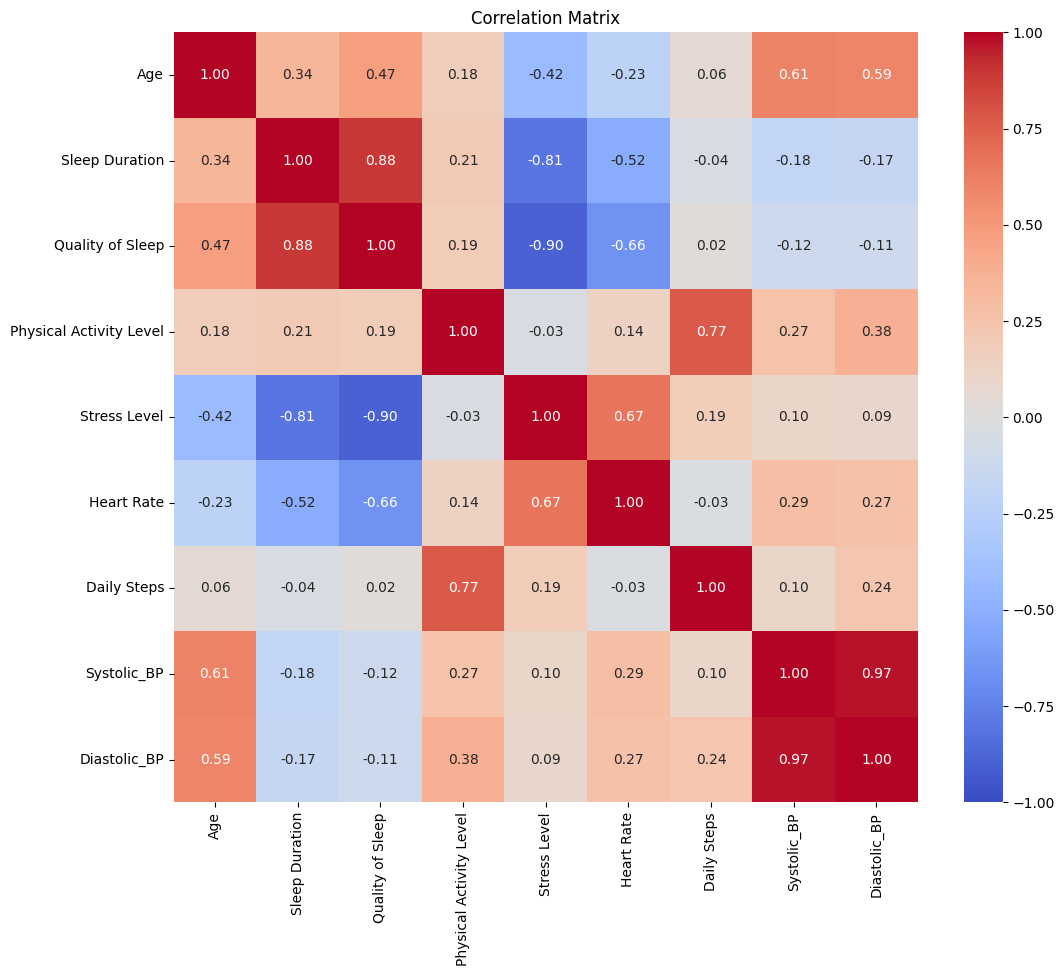

In [139]:
corr_matrix = df1[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

##### 4.3.1 FINDINGS from CORRELATION MATRIX

- **Age**: Shows a positive correlation with blood pressure (Systolic_BP and Diastolic_BP).

- **Sleep Duration**: Positively correlated with sleep quality and negatively correlated with stress level.

- **Stress Level**: Negatively correlated with both sleep duration and quality, and positively correlated with heart rate.

- **Physical Activity Level**: Positively correlated with daily steps and slightly with high and low blood pressure.

- **Heart Rate**: Moderately positively correlated with stress level and blood pressure.

- **Systolic_BP and Diastolic_BP**: Strongly correlated, indicating a consistent relationship between systolic and diastolic blood pressure.

## 5) Feature Engineering

* The only column needs to be split was the 'Blood Pressure' which was already done earlier into Systolic_BP and Diastolic_BP.

## 6) Conclusion

In [140]:
## SAVING THE PROCESSED DATAFRAME

df1.to_csv('/Users/syed/Documents/Sleep-Health-and-Lifestyle/notebook/DATA/processed_data.csv', index=False)

The analysis of the dataset provides several valuable insights into the relationship between various health and lifestyle factors across different demographic groups:

1. **Demographic Insights**:

   - The dataset is nearly balanced between genders, with almost equal numbers of males and females.

   - Occupation impacts health metrics significantly. For instance, professions such as Nursing and Medicine are associated with higher stress levels, while Engineers and Teachers generally report better sleep quality.

   - Individuals categorized as 'Obese' or 'Overweight' tend to have lower physical activity levels and higher stress levels compared to those in the 'Normal' BMI category.

2. **Health Metrics**:

   - **Age**: There is a positive correlation with blood pressure, indicating that blood pressure tends to rise with age.

   - **Sleep Duration and Quality**: Better sleep quality is linked with longer sleep duration and lower stress levels. Those without sleep disorders report better sleep quality and healthier metrics overall.

   - **Stress Levels**: Higher stress levels are associated with poorer sleep quality and higher heart rates, suggesting that effective stress management could improve overall health.

   - **Physical Activity**: Positive correlations with daily steps and a slight correlation with blood pressure suggest that higher physical activity levels are beneficial for health outcomes.

3. **Blood Pressure**:

   - A strong correlation between systolic and diastolic blood pressure indicates a consistent relationship in blood pressure measurements.

In summary, maintaining a balanced lifestyle with adequate sleep, regular physical activity, and stress management is crucial for optimal health. Additionally, factors such as 
occupation and BMI category significantly influence various health outcomes. Targeted interventions addressing these factors could lead to improvements in individual well-being and 
overall health.
